In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [14]:
import sqlite3

import pandas as pd

prefix = "binaryoptimization/maxcut"
# prefix = "discreteoptimization/tsp"
# prefix = "binaryoptimization/max3sat/satlib"

clauses = [
    f"`hid` LIKE '{prefix}%'",
    "`trotterization` = 'suzuki_trotter'",
    "`n_timesteps` = 1",
    "`order` = 4",
    "`n_qubits` <= 156",
    "`n_terms` <= 1000",
]
query = "SELECT * FROM `results` WHERE " + " AND ".join(clauses)

db = sqlite3.connect("out/results/results.db")
results = pd.read_sql(query, db)
db.close()

results.dropna(inplace=True)
results["time"] = results["reordering_time"] + results["synthesis_time"]
results.drop(["jid", "reordering_time", "synthesis_time"], axis=1, inplace=True)

results

,hid,method,n_terms,n_qubits,n_timesteps,order,trotterization,depth,time
0,binaryoptimization/maxcut/ciqube/ratio912-hams...,none,54,41,1,4,suzuki_trotter,145,3.899
1,binaryoptimization/maxcut/biqmac/rudy-hams/6-p...,none,395,99,1,4,suzuki_trotter,565,23.740
2,binaryoptimization/maxcut/biqmac/rudy-hams/2-p...,misra_gries,88,96,1,4,suzuki_trotter,90,12.031
3,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,saturation,854,100,1,4,suzuki_trotter,425,189.594
4,binaryoptimization/maxcut/ciqube/ratio912-hams...,saturation,23,41,1,4,suzuki_trotter,55,3.347
...,...,...,...,...,...,...,...,...,...
401944,binaryoptimization/maxcut/biqmac/rudy-hams/7-p...,none,66,100,1,4,suzuki_trotter,205,4.957
401945,binaryoptimization/maxcut/ciqube/ratio912-hams...,misra_gries,7,38,1,4,suzuki_trotter,30,1.920
401946,binaryoptimization/maxcut/biqmac/rudy-hams/5-w...,misra_gries,20,99,1,4,suzuki_trotter,55,3.517
401947,binaryoptimization/maxcut/random/ham-graph-reg...,none,120,48,1,4,suzuki_trotter,190,13.071


In [15]:
df = results.groupby(["hid", "trotterization", "n_timesteps", "order", "method"]).mean()
df = df.reset_index(level=-1)

baseline = df[df["method"] == "none"].drop(["method", "n_terms"], axis=1)
df["depth_pc"] = df["depth"] * 100 / (baseline["depth"] + 1e-3)
df["time_pc"] = df["time"] * 100 / (baseline["time"] + 1e-3)

df = df.reset_index()

df["problem_group"] = df["hid"].map(lambda hid: "/".join(hid.split("/")[:3]))

df = df.astype({"n_terms": int, "depth": int, "n_timesteps": int, "order": int})
df

,hid,trotterization,n_timesteps,order,method,n_terms,n_qubits,depth,time,depth_pc,time_pc,problem_group
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,misra_gries,45,82.0,90,9.087333,54.545124,250.316775,binaryoptimization/maxcut/biqmac
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,none,45,82.0,165,3.629333,99.999394,99.972454,binaryoptimization/maxcut/biqmac
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,saturation,45,82.0,90,7.501667,54.545124,206.638509,binaryoptimization/maxcut/biqmac
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,misra_gries,66,93.0,110,15.418000,53.658275,331.474846,binaryoptimization/maxcut/biqmac
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,none,66,93.0,205,4.650333,99.999512,99.978501,binaryoptimization/maxcut/biqmac
...,...,...,...,...,...,...,...,...,...,...,...,...
133978,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,none,8,9.0,75,0.991333,99.998667,99.899227,binaryoptimization/maxcut/random
133979,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,saturation,8,9.0,75,1.767667,99.998667,178.132348,binaryoptimization/maxcut/random
133980,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,misra_gries,89,90.0,885,237.032667,99.999887,4014.327650,binaryoptimization/maxcut/random
133981,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,none,89,90.0,885,5.903667,99.999887,99.983064,binaryoptimization/maxcut/random


In [16]:
df["problem_group"].unique()

array(['binaryoptimization/maxcut/biqmac',
       'binaryoptimization/maxcut/ciqube',
       'binaryoptimization/maxcut/random'], dtype=object)

In [17]:
# Filter and remove outliers

from scipy.stats import zscore
import numpy as np

MAX_ZSCORE = 3

x = df[["time", "n_terms", "depth", "time_pc"]].to_numpy()
p = (np.abs(zscore(x)) < MAX_ZSCORE).all(axis=1)
print("Dropping", len(df) - p.sum(), "rows")
df = df[p]
df

Dropping 8495 rows


,hid,trotterization,n_timesteps,order,method,n_terms,n_qubits,depth,time,depth_pc,time_pc,problem_group
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,misra_gries,45,82.0,90,9.087333,54.545124,250.316775,binaryoptimization/maxcut/biqmac
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,none,45,82.0,165,3.629333,99.999394,99.972454,binaryoptimization/maxcut/biqmac
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,saturation,45,82.0,90,7.501667,54.545124,206.638509,binaryoptimization/maxcut/biqmac
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,misra_gries,66,93.0,110,15.418000,53.658275,331.474846,binaryoptimization/maxcut/biqmac
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,suzuki_trotter,1,4,none,66,93.0,205,4.650333,99.999512,99.978501,binaryoptimization/maxcut/biqmac
...,...,...,...,...,...,...,...,...,...,...,...,...
133972,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,none,7,8.0,65,1.142000,99.998462,99.912511,binaryoptimization/maxcut/random
133973,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,saturation,7,8.0,65,1.441000,99.998462,126.071741,binaryoptimization/maxcut/random
133977,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,misra_gries,8,9.0,75,1.768333,99.998667,178.199530,binaryoptimization/maxcut/random
133978,binaryoptimization/maxcut/random/ham-graph-sta...,suzuki_trotter,1,4,none,8,9.0,75,0.991333,99.998667,99.899227,binaryoptimization/maxcut/random


In [18]:
for m in df["method"].unique():
    if m == "none":
        continue
    print(
        f"[{m}] Avg. depth reduction:",
        (100 - df[df["method"] == m]["depth_pc"]).mean(),
        "%",
    )
    print(f"[{m}] Avg. time cost:", df[df["method"] == m]["time_pc"].mean(), "%")

[misra_gries] Avg. depth reduction: 42.40618814360759 %
[misra_gries] Avg. time cost: 228.98267623350023 %
[saturation] Avg. depth reduction: 46.191106866674154 %
[saturation] Avg. time cost: 181.7737093696979 %


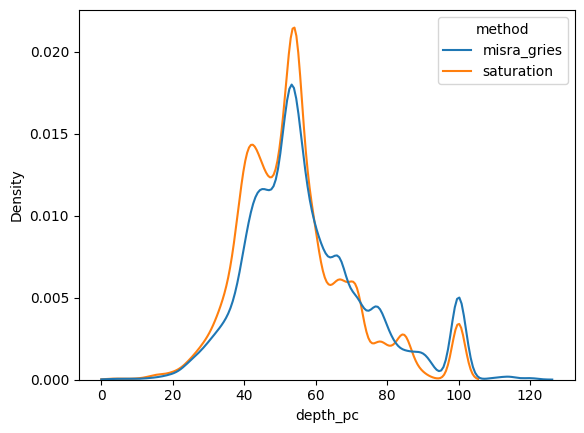

In [19]:
import seaborn as sns

_df = df[df["method"] != "none"]
ax = sns.kdeplot(data=_df, x="depth_pc", hue="method", clip=(0, None))

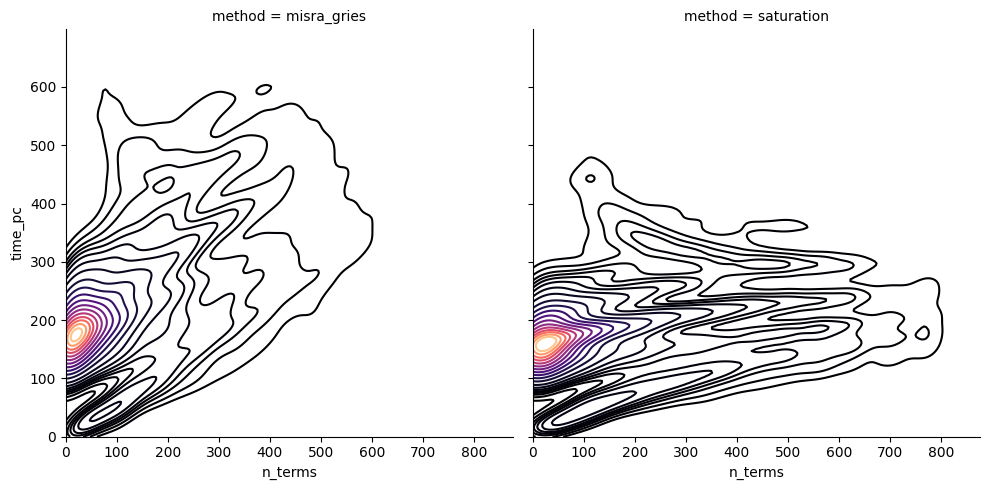

In [10]:
import seaborn as sns

_df = df[df["method"] != "none"]
ax = sns.displot(
    data=_df,
    x="n_terms",
    y="time_pc",
    col="method",
    kind="kde",
    cmap="magma",
    levels=20,
    clip=((0, None), (0, None)),
)

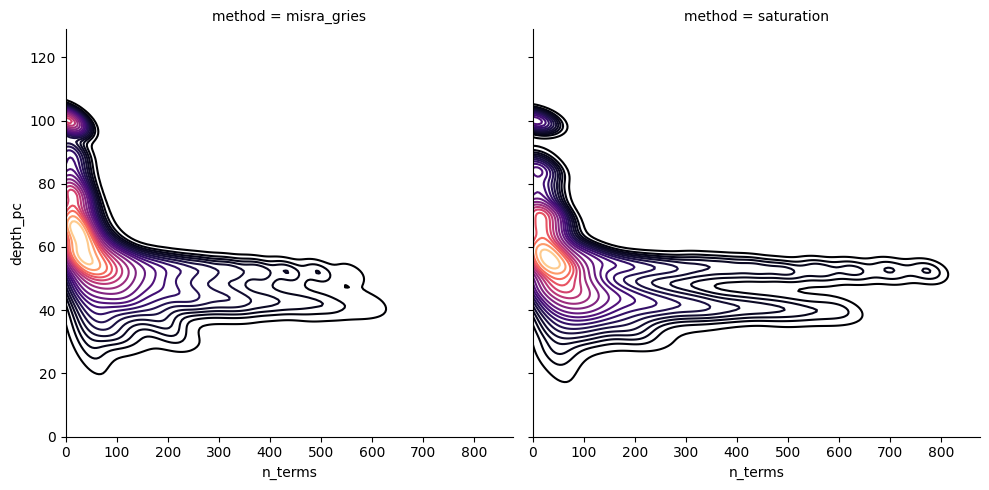

In [11]:
import seaborn as sns

_df = df[df["method"] != "none"]
ax = sns.displot(
    data=_df,
    x="n_terms",
    y="depth_pc",
    col="method",
    kind="kde",
    cmap="magma",
    levels=20,
    clip=((0, None), (0, None)),
)